## Data Analysis for Road Accidents in USA

In [1]:
#pip install opendatasets --upgrade --quiet

- Utilizing the kaggle API to download the dataset

In [2]:
# use it for first time or while using on cloud

#import opendatasets as od

#download_url = "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"

#od.download(download_url)

- Loading our data file

In [3]:
data_file = "./us-accidents/US_Accidents_March23.csv"

- We will utilise the python libraries for data analysis
- NumPy , Pandas, Seaborn, matplotlob

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(data_file)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()  #basic understanding of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.describe()  # A statistical measure of all the numerical columns to understanding the spread of data.

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
numerics = ['int64','int32','int16','float16','float32','float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [9]:
missing_percentage = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

<Axes: >

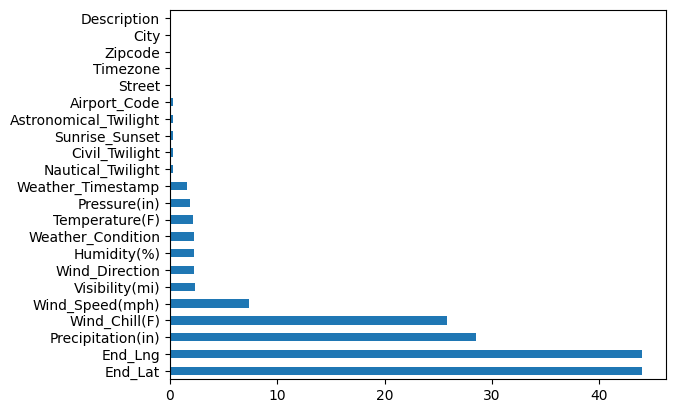

In [10]:
# As simple plot of the dataset where we have missing data.

missing_percentage[missing_percentage>0].plot(kind='barh')

##### There are columns which have a lot of missing data and we should not take those into consideration.
##### Those which have some missing data we need to apply some transformation to those columns to fill in the missig values.

In [11]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Exploratory Data Analysis

#### We will look for some columns and analyse.
- City
- Start Time
- Start_Long, Start_Lat
- Temperature
- Weather Condition

#### Exploring CITY

In [12]:
df.City.nunique()

13678

In [13]:
cities_by_accidents = df['City'].value_counts()
cities_by_accidents.head(20)

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

###### New York has the highest popluation why it's not showing even in topn 20 cities having most accidents
##### let find whether New York is in dataset or not

In [14]:
'NY' in df.State

False

- New York is not in the dataset

In [15]:
df.State.nunique()  ##however US has actual 52 states we have3 missing states in dataset

49

<Axes: ylabel='City'>

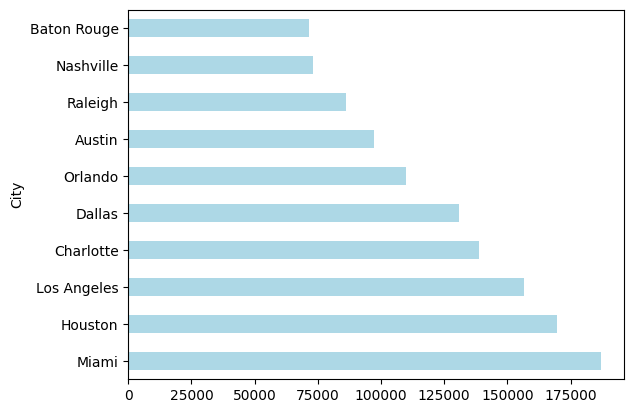

In [16]:
## plot for top 10 cities haveing most accidents

cities_by_accidents.head(10).plot(kind='barh',color='lightblue')

#### Utilizing the Python Visualization libraries to draw some insights about data.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

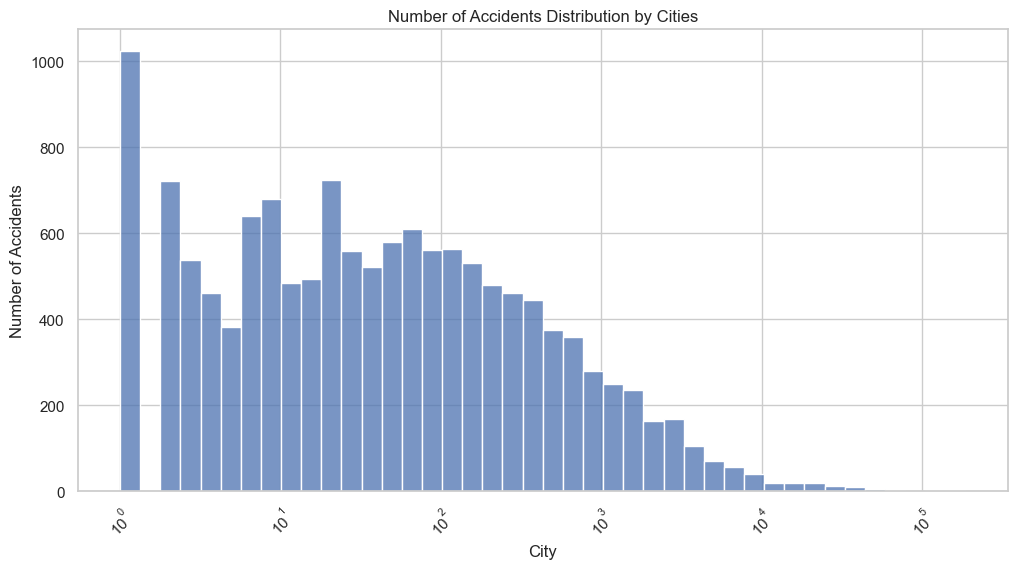

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(cities_by_accidents,log_scale=True)

plt.title('Number of Accidents Distribution by Cities')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.show()


In [19]:
## splitting the cities with max and min accidents

high_accidents_cities = cities_by_accidents[cities_by_accidents>=1000]
low_accidents_cities = cities_by_accidents[cities_by_accidents<1000]

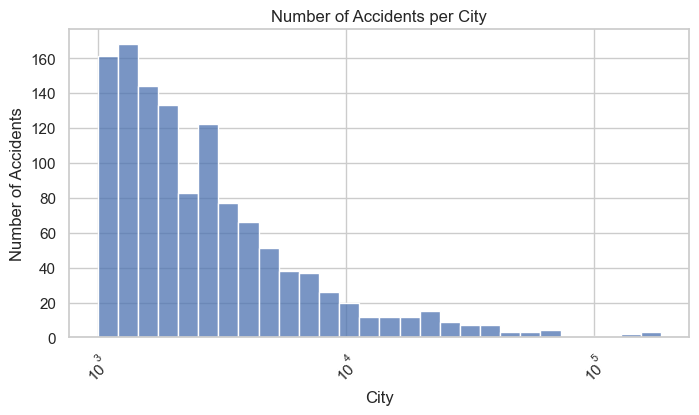

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(high_accidents_cities,log_scale=True)
plt.title('Number of Accidents per City')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.show()

<Axes: xlabel='count', ylabel='Count'>

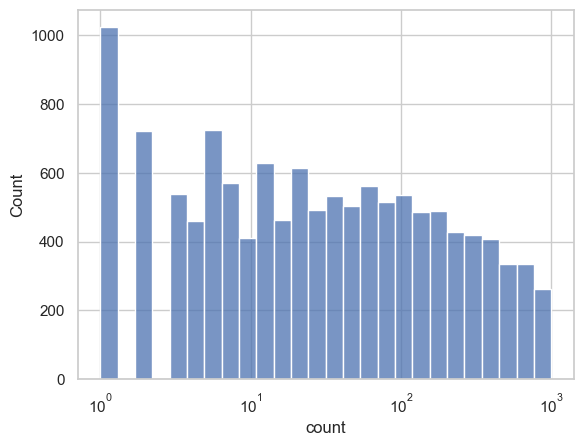

In [21]:
sns.histplot(low_accidents_cities,log_scale=True)

In [22]:
(len(cities_by_accidents[cities_by_accidents<=5])/df.City.nunique())*100
(len(cities_by_accidents[cities_by_accidents>=1000])/df.City.nunique())*100
(len(cities_by_accidents[cities_by_accidents<=1])/df.City.nunique())*100

7.479163620412341

### Summary of City Column

- There is no data available for New York (total 3 states data is missing out od 52 States)
- Accidents per city increased/decreases exponentially
- Around 22% of total city has less then 5 accidents per year
- Around 8% of total city has around 1000+ accidents per year
- Around 7.4% of total city has less then or 1 accident per year

#### Exploring  Start_time

##### QUE
- What time of the day accidents are most frequent
- Which day of the week has most accidents
- Which months have the most accidents
- What is the trend of accidents year over year ( decreasing/increasing)

In [23]:
df['Start_Time'][0]

'2016-02-08 05:46:00'

In [24]:
### Conver to datetime 

df['Start_Time'] = pd.to_datetime(df.Start_Time,format='mixed')

In [25]:
df['Start_Time'][0]

Timestamp('2016-02-08 05:46:00')

C:\Users\DIPRASHA\AppData\Local\Temp\ipykernel_2636\296162423.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours_of_accidents,bins=24,kde=False,norm_hist=True)


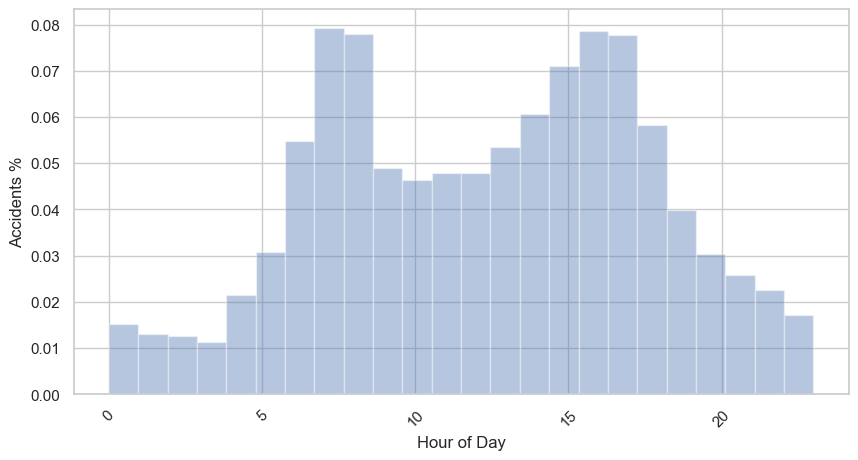

In [26]:
# finding out during which hours accidents occurs frequently

hours_of_accidents = df.Start_Time.dt.hour

plt.figure(figsize=(10, 5))
sns.distplot(hours_of_accidents,bins=24,kde=False,norm_hist=True)
plt.xlabel('Hour of Day')
plt.ylabel('Accidents %')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.show()

In [27]:

weekday = {0:"Monday",1:"Tuesday",2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekday_of_accidents = df.Start_Time.dt.dayofweek
weekday_of_accidents = weekday_of_accidents.map(weekday)
weekday_of_accidents

0          Monday
1          Monday
2          Monday
3          Monday
4          Monday
            ...  
7728389    Friday
7728390    Friday
7728391    Friday
7728392    Friday
7728393    Friday
Name: Start_Time, Length: 7728394, dtype: object

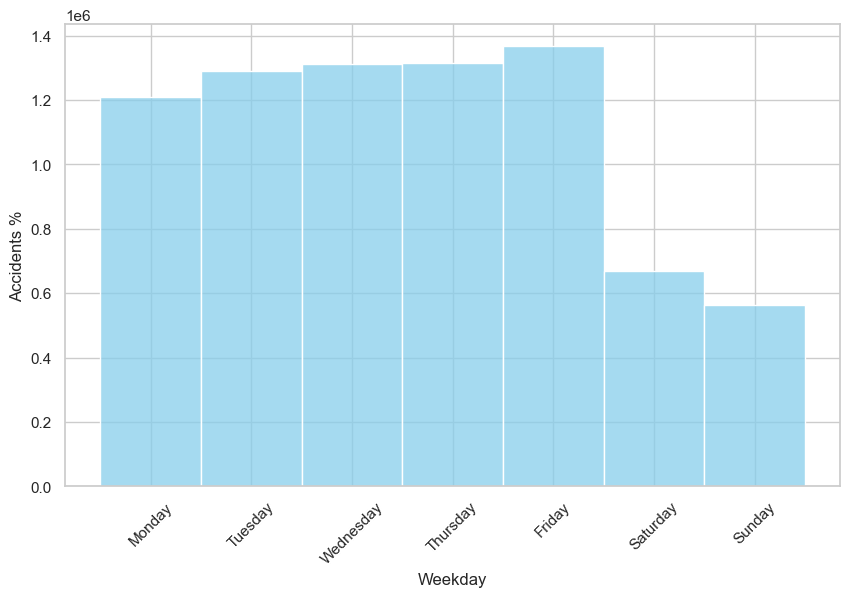

In [28]:
# finding out during which hours accidents occurs frequently

plt.figure(figsize=(10, 6))
sns.histplot(weekday_of_accidents, binwidth=2,color="skyblue")
plt.xlabel('Weekday')
plt.ylabel('Accidents %')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

plt.show()

C:\Users\DIPRASHA\AppData\Local\Temp\ipykernel_2636\1420050451.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekends_start_time.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')


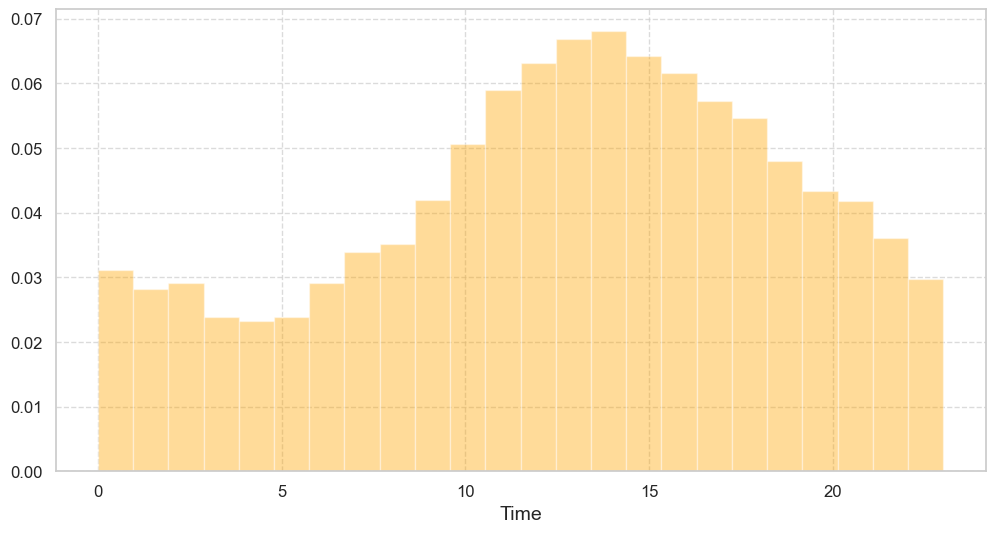

In [29]:
weekends_start_time = df.Start_Time[df['Start_Time'].dt.dayofweek>=5]

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.distplot(weekends_start_time.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')
#sns.displot(weekends_start_time.dt.hour,bins=24,color='orange')

plt.xlabel('Time', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the grid
plt.grid(True, linestyle='--', alpha=0.7)

C:\Users\DIPRASHA\AppData\Local\Temp\ipykernel_2636\951491268.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Month_trend,color='violet',kde=False,bins=12)


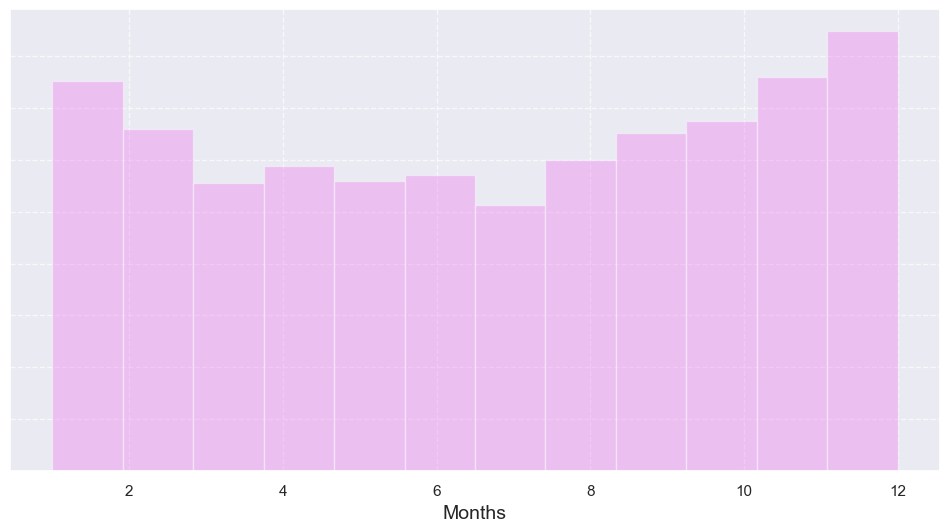

In [30]:
Month_trend = df['Start_Time'].dt.month

sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.distplot(Month_trend,color='violet',kde=False,bins=12)
plt.xlabel('Months', fontsize=14)
plt.yticks(visible=False)
plt.grid(True, linestyle='--', alpha=0.7)

- The above trend shows that accidents are high during winder and less in summer,
- But may be there is discrepancy in dataset so lets drill down and explore the trend for a particular year.

C:\Users\DIPRASHA\AppData\Local\Temp\ipykernel_2636\2927916004.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0], x=Month_trend_2018,color='red',bins=12)
C:\Users\DIPRASHA\AppData\Local\Temp\ipykernel_2636\2927916004.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1], x=

<Axes: ylabel='Density'>

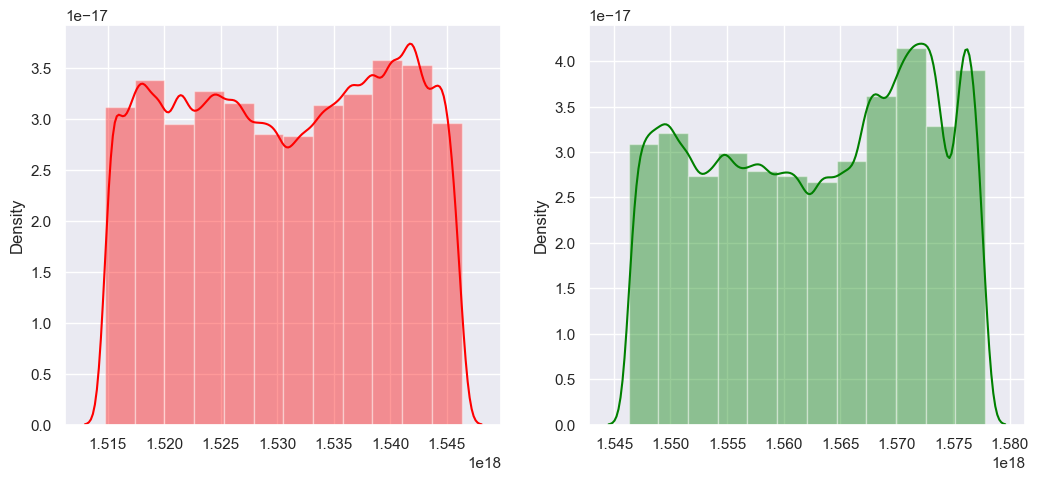

In [31]:
Month_trend_2018 = df.Start_Time[df.Start_Time.dt.year == 2018]
Month_trend_2019 = df.Start_Time[df.Start_Time.dt.year == 2019]

sns.set(style='darkgrid')
fig, axes = plt.subplots(1,2,figsize=(12, 5))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

sns.distplot(ax=axes[0], x=Month_trend_2018,color='red',bins=12)
sns.distplot(ax=axes[1], x=Month_trend_2019,color='green',bins=12)


#### Summary 

- A high percentage of accidents occus between 6 AM to 10 AM (Commute hours, rushing to work)
- Next high percentage is between 3 PM to 6 PM (Commute hours, people returning from work) 
- on weekends peak hours are different from weekdays i.e 10 AM to 3 PM ( peak traffic hours)
- From monthwise trend analysis, accidents are high during winters and reduces during summer.

#### Analysing Latitude and Longitude 

In [32]:
df.Start_Lat.nunique()

2428358

In [33]:
df_sample = df.sample(int(0.001*len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

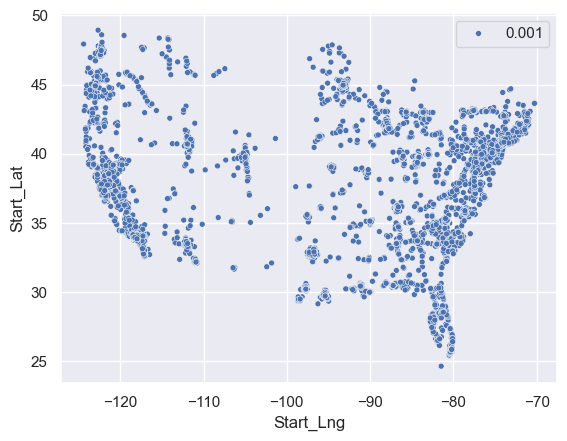

In [34]:
sns.scatterplot(x=df_sample.Start_Lng,y=df_sample.Start_Lat,size=0.001)

In [35]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [36]:
lat_lon_pair = list(zip(df_sample.Start_Lat,df_sample.Start_Lng))
lat_lon_pair

[(33.64020900000001, -112.08287),
 (37.600709, -120.993524),
 (25.808519, -80.32002299999998),
 (47.45389, -122.26468),
 (30.411489000000003, -91.043556),
 (41.808914, -71.440536),
 (36.07907, -120.10532),
 (40.60653090457626, -105.0015413756132),
 (36.98434710484989, -122.0296847814463),
 (40.037366, -75.24713100000002),
 (26.557005, -81.885307),
 (37.63211, -77.45047),
 (36.0653, -80.264297),
 (42.86792, -78.827492),
 (39.963602, -86.247816),
 (29.666783, -95.348925),
 (47.410282, -94.863756),
 (45.544353, -122.676422),
 (33.764496, -84.38511700000002),
 (43.152036, -77.61533100000003),
 (37.48520900000001, -77.402771),
 (33.963278531866244, -117.32431769315087),
 (39.014868, -121.004094),
 (34.079355, -118.227248),
 (28.53437000000001, -81.528687),
 (35.4207, -97.56554),
 (34.106528999999995, -80.90209200000002),
 (34.056125879125325, -118.24118256512529),
 (34.257134, -114.646131),
 (41.05418086032365, -74.18748736346154),
 (35.78126500000001, -78.736809),
 (35.43031699999999, -97.

In [37]:
Map= folium.Map()
HeatMap(lat_lon_pair).add_to(Map)
Map

### Questins to Explore..?

#### More accidents in cold or warm areas ?
#### Which state has the higher accidents ? How about per capita ? ## a state might have 1 million pop and other might have 50 M (so there shouldn't be bias

In [38]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [39]:
print('Unique values : ',df['Temperature(F)'].nunique())
print('Max temp(F) value: ',df['Temperature(F)'].max())
print('Min temp(F) value: ',df['Temperature(F)'].min())
print('Average temp(F) value: ',df['Temperature(F)'].mean())

Unique values :  860
Max temp(F) value:  207.0
Min temp(F) value:  -89.0
Average temp(F) value:  61.66328580941001


- The maximum temperature seems to be abnormal let's explore that

- 110 F == 43 C , let's explore the temperature greater tham 43 degree C

- df['Temperature(F)'][df['Temperature(F)']>110].value_counts().sort_values(ascending=False)

C:\Users\DIPRASHA\AppData\Local\Temp\ipykernel_2636\974657600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature(F)'],bins = 20)


<Axes: xlabel='Temperature(F)', ylabel='Density'>

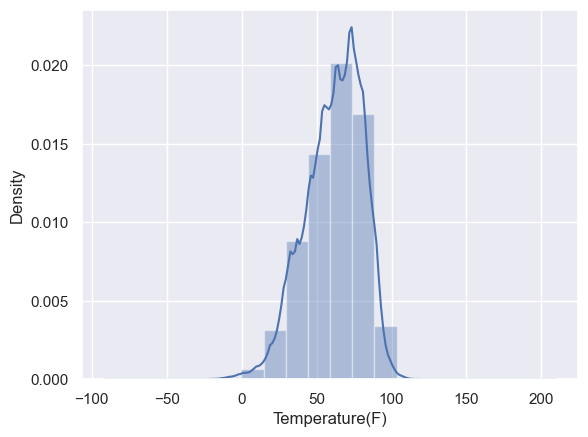

In [40]:
sns.distplot(df['Temperature(F)'],bins = 20)

- The spread of temperature shows that most accident occurs in temperature range of 80 to 100 F or 26 C to 

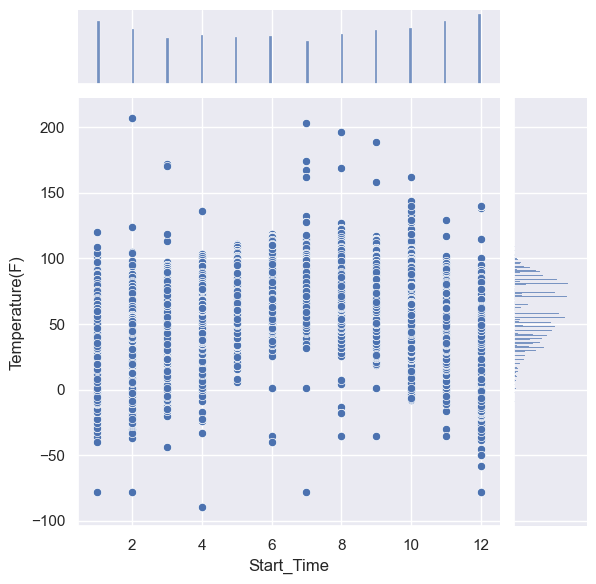

In [41]:
sns.jointplot(x=Month_trend,y='Temperature(F)',data=df)

In [42]:
print(df['Weather_Condition'].nunique())
print(df['Weather_Condition'].value_counts().sort_values(ascending=False)[:100])

144
Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Sand                              19
Freezing Rain / Windy             18
Light Rain Shower / Windy         16
Light Sleet / Windy               15
Mist / Windy                      15
Name: count, Length: 100, dtype: int64


In [43]:
df['Weather_Condition'].value_counts().sort_values(ascending=False)[:10]

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

In [44]:
# Data
data = {
    'Weather_Condition': [
        'Fair', 'Mostly Cloudy', 'Cloudy', 'Clear', 'Partly Cloudy', 
        'Overcast', 'Light Rain', 'Scattered Clouds', 'Light Snow', 'Fog'
    ],
    'Count': [
        2560802, 1016195, 817082, 808743, 698972, 
        382866, 352957, 204829, 128680, 99238
    ]
}

# Convert to DataFrame
weather_count = pd.DataFrame(data)

print(weather_count)


  Weather_Condition    Count
0              Fair  2560802
1     Mostly Cloudy  1016195
2            Cloudy   817082
3             Clear   808743
4     Partly Cloudy   698972
5          Overcast   382866
6        Light Rain   352957
7  Scattered Clouds   204829
8        Light Snow   128680
9               Fog    99238


#### Plotting the visualisation of most accidents in which weather condition

- There are a total of 144 different weather conditions, we will be plotting for top 10 conditions having most accidents

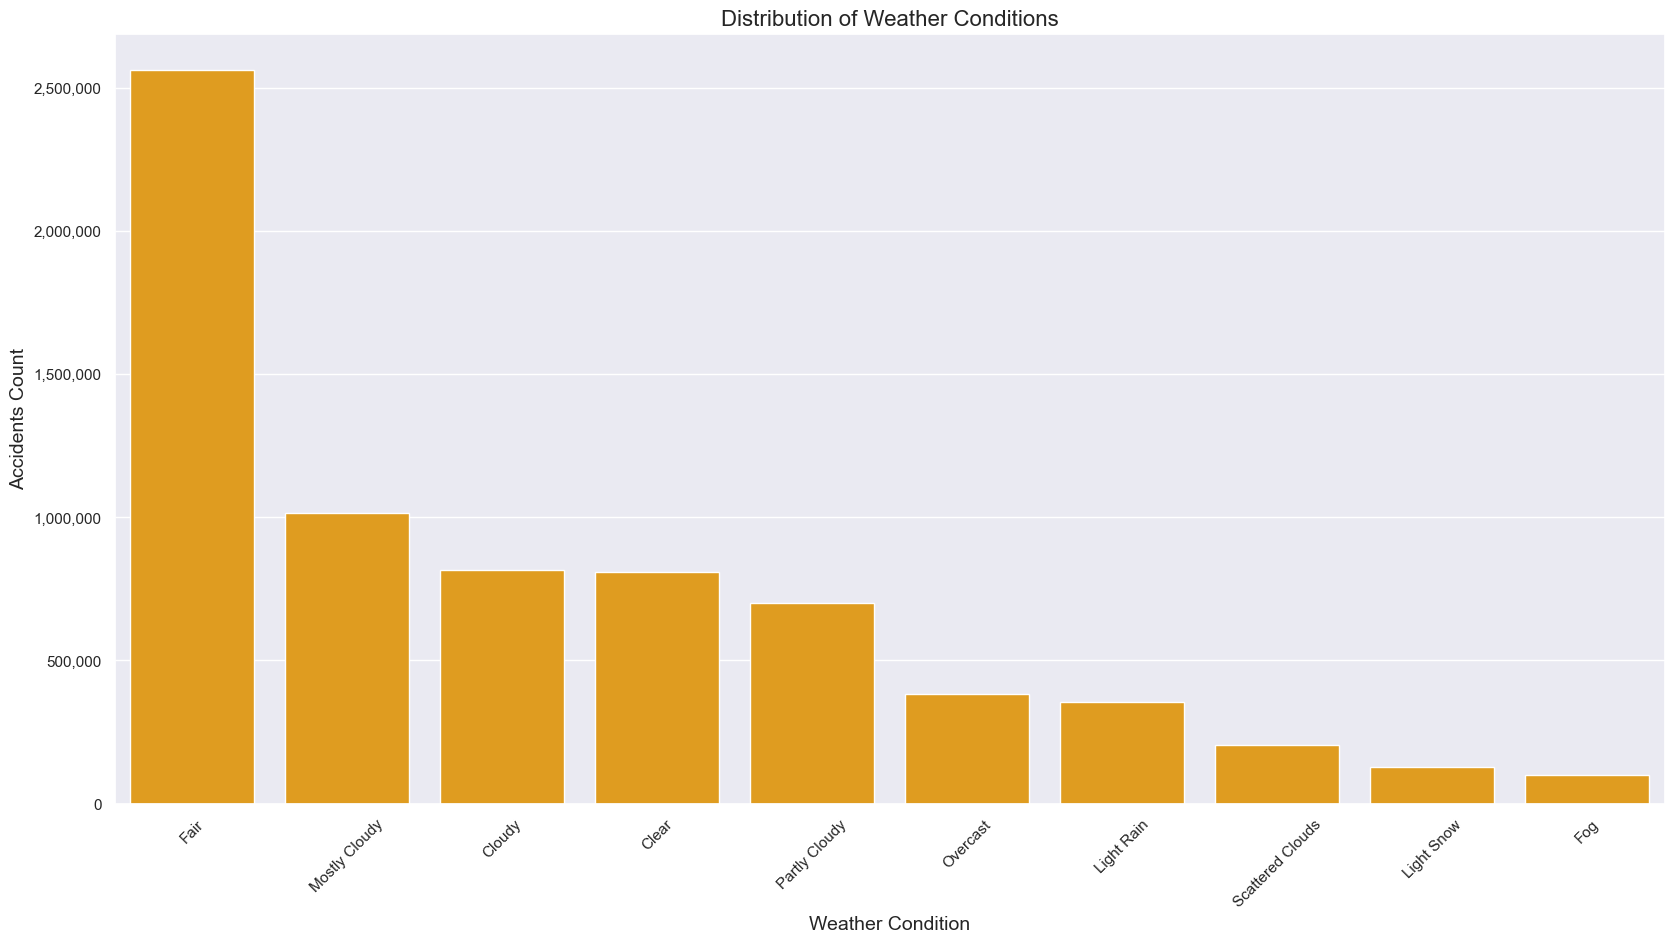

In [45]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Weather_Condition', y='Count', data=weather_count,color='orange')
plt.xticks(rotation=45)
plt.yscale('linear')
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Accidents Count', fontsize=14)
plt.title('Distribution of Weather Conditions', fontsize=16)

# Improve y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()



####__________________________________________________________________________________________________________________#####



#

###                                                                                                                                                 Diwaker Prashar